In [1]:
import numpy as np
from numpy.random import RandomState
from numpy.linalg import lstsq
from matplotlib.pyplot import plot

In [2]:
rnd = RandomState(seed=1234)

In [3]:
X = rnd.normal(0, 0.1, size=(100, 10))
S = np.exp(np.cumsum(X, axis=0))

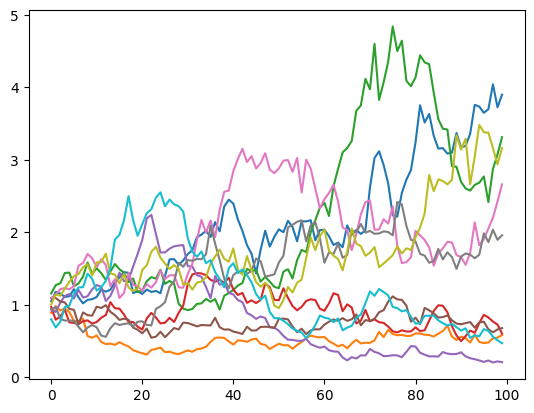

In [4]:
plot(S);

In [5]:
def exercise_value(s):
    return np.maximum(s - 1, 0)

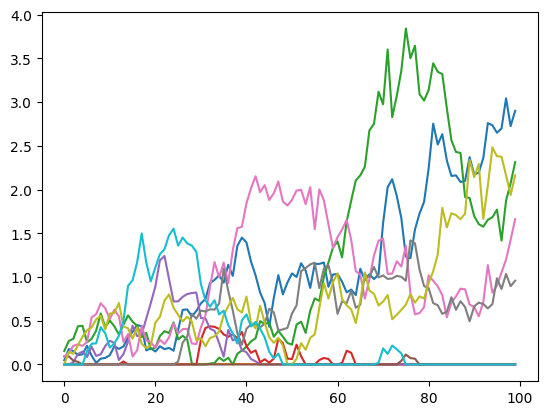

In [6]:
plot(exercise_value(S));

In [7]:
exercise_value(S[-1, :])

array([2.90082492, 0.        , 2.31318746, 0.        , 0.        ,
       0.        , 1.66202202, 0.95838469, 2.16373877, 0.        ])

In [8]:
def regression_basis(s):
    assert s.ndim == 1
    s = s.reshape((s.shape[0], 1))
    return np.concatenate((s**0, s**1, s**2, s**3), axis=1)

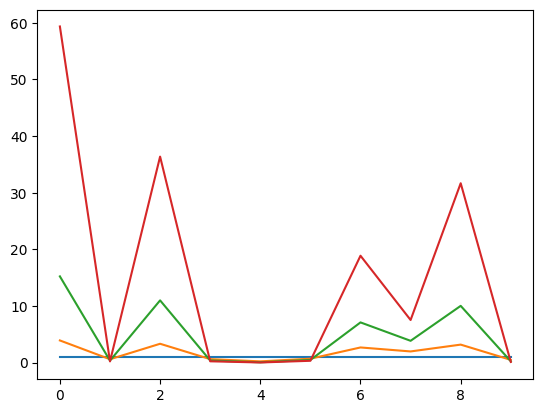

In [9]:
plot(regression_basis(S[-1, :]));

In [10]:
regression_basis(S[-1, :])

array([[1.00000000e+00, 3.90082492e+00, 1.52164350e+01, 5.93566489e+01],
       [1.00000000e+00, 5.80573641e-01, 3.37065753e-01, 1.95691492e-01],
       [1.00000000e+00, 3.31318746e+00, 1.09772111e+01, 3.63695583e+01],
       [1.00000000e+00, 6.00853349e-01, 3.61024747e-01, 2.16922928e-01],
       [1.00000000e+00, 2.05217199e-01, 4.21140987e-02, 8.64253737e-03],
       [1.00000000e+00, 6.75870546e-01, 4.56800996e-01, 3.08738339e-01],
       [1.00000000e+00, 2.66202202e+00, 7.08636125e+00, 1.88640497e+01],
       [1.00000000e+00, 1.95838469e+00, 3.83527058e+00, 7.51093516e+00],
       [1.00000000e+00, 3.16373877e+00, 1.00092430e+01, 3.16666302e+01],
       [1.00000000e+00, 4.67938726e-01, 2.18966651e-01, 1.02462976e-01]])

In [11]:
lsqtsq_res = lstsq(regression_basis(S[-2, :]), exercise_value(S[-1, :]), rcond=None)
beta = lsqtsq_res[0]
lsqtsq_res

(array([ 0.09331796, -0.57606395,  0.74999844, -0.10575742]),
 array([0.0073856]),
 4,
 array([69.62425559,  4.18392423,  1.71738884,  0.21923881]))

In [12]:
def perform_regression(s, y):
    return lstsq(regression_basis(s), y, rcond=None)[0]

In [13]:
perform_regression(S[-2, :], exercise_value(S[-1, :]))

array([ 0.09331796, -0.57606395,  0.74999844, -0.10575742])

In [14]:
regression_basis(S[-2, :]) @ perform_regression(S[-2, :], exercise_value(S[-1, :]))

array([ 2.88839469e+00, -1.51792308e-02,  2.33688190e+00,  2.94373016e-02,
        2.55964445e-03,  8.78543757e-03,  1.59895672e+00,  9.75577439e-01,
        2.19248590e+00, -1.97419468e-02])

In [15]:
total = exercise_value(S[-1, :])
for i in reversed(range(S.shape[0] - 1)):
    beta = perform_regression(S[i, :], total)
    exercise = exercise_value(S[i, :])
    continuation = regression_basis(S[i, :]) @ beta
    total = np.maximum(exercise, continuation)

In [16]:
np.average(total)

1.2662214637735985

In [17]:
np.average(exercise_value(S[-1, :]))

0.9998157855883487